In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Support Vector Machines (SVM)

Celem SVM jest znalezienie takiej hiper-lini, ktora oddziela przypadki pozytywne od negatywnych. Algorytmu uzywa sie do klasyfikacji. Chcemy zaklasyfikowac czerwony punkt.

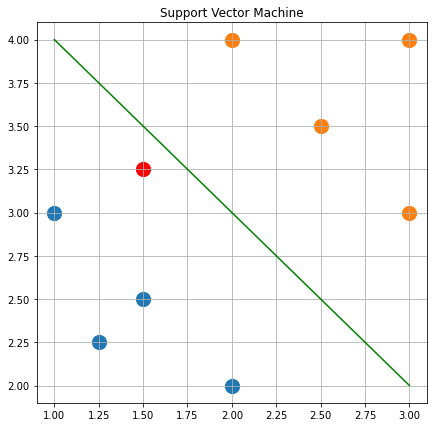

In [26]:
positive = np.array([[1.25, 2.25], [1, 3], [2, 2], [1.5, 2.5]])
negative = np.array([[2, 4], [3, 3], [3, 4], [2.5, 3.5]])


plt.figure(figsize=(7,7))
plt.title("Support Vector Machine")
plt.scatter(positive[:,0], positive[:,1], s=200)
plt.scatter(negative[:,0], negative[:,1], s=200)
plt.scatter(1.5, 3.25, s=200, c='r')
plt.plot([1, 3], [4, 2], c='g')
plt.grid()
plt.show()

## Etap 1

Punkt czerwony mozemy traktowac jak wielowymiarowy wektor $u$, ktory jest naszym przypadkiem do klasyfikacji. Mozemy zrzutowac wektor $u$ na wektor prostopadly do hiper-lini, oznaczmy go jako $v$.

$$(\overrightarrow{u} \cdot \overrightarrow{v}) \overrightarrow{v}$$

dzieki temu otrzymujemy wektor zrzutowany na wektor prostopadly do hiper-lini. Nastepnie musimy obliczyc dlugosc tego wektora i porownac ja do stalej, aby wiedziec po ktorej stronie hiper-lini jest czerwona kropka.

$$\overrightarrow{u} \cdot \overrightarrow{v} \geq c$$

Jezeli powyzsza nierownosc jest spelniona to wtedy punkt jest klasyfikowany jako pomaranczonwy. Rownowaznie mozemy zapisac.

$$\overrightarrow{u} \cdot \overrightarrow{v} + b \geq 0$$

## Etap 2

<img src="./optimal-hyperplane.png" >

W przypadku kiedy maksimum margin jest rowny $2$. To mozemy zapisac dwie nierownosci.

$$\overrightarrow{v} \cdot \overrightarrow{x_+} + b \geq 1$$
$$\overrightarrow{v} \cdot \overrightarrow{x_-} + b \leq -1$$


gdzie $x_+$ to przypadek pozytywny oraz $x_-$ to przypadek negatywny.

Kolejnym krokiem bedzie w pewnym sensie zredukowanie liczby nierownosci poprzez wprowadzenie nowej zmiennej $y$, ktora dla przypadkow pozytywnych bedzie miala wartosc $1$ natomiast dla przypadkow negatywnych wartosc $-1$. Wtedy z dwoch rownan mozemy zrobic jedno ogolne rownanie.

$$y_i (\overrightarrow{v} \cdot \overrightarrow{x_i} + b) \geq 1$$

gdzie $x_i$ to nasze przypadki treningowe oraz $y_i$ to odpowiadajace wartosc dla danego przypadku.

## Etap 3

Celem zadanie jest zmaksymalizowanie "margin", czyli odleglosci miedzy fioletowymi prostymi. W tym celu narysowalismy trzy wektory. Pierwszy z nich to przypadek pozytywny (zielony), drugi to przypadek negatywny (czerwony) oraz trzeci (czarny) jest roznica miedzy nimi.

Teraz musimy wyprowadzic wzor na odleglosc miedzy dwoma liniami fioletowymi. Jestesmy w stanie to wykonac za pomoca roznicy wektorow oraz wektora ktory jest ortonormalny do fioletowych lini. Jezeli policzymy iloczyn skalarny z tych dwoch wektorow to otrzymamy interesujaca nas odleglosc.


$$width = (\overrightarrow{x_+} - \overrightarrow{x_-}) \cdot \frac{\overrightarrow{v}}{||v||}$$

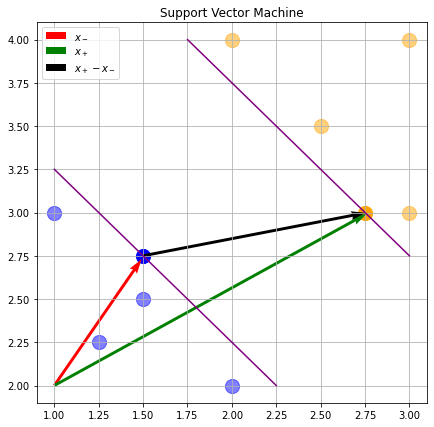

In [71]:
plt.figure(figsize=(7,7))
plt.title("Support Vector Machine")
plt.scatter(1.5, 2.75, s=200, c='b')
plt.scatter(2.75, 3, s=200, c='orange')
plt.scatter(positive[:,0], positive[:,1], s=200, alpha=0.5, c='b')
plt.scatter(negative[:,0], negative[:,1], s=200, alpha=0.5, c='orange')
plt.quiver(1, 2, 1.9, 2.75, scale=8.5, label="$x_-$", color='red')
plt.quiver(1, 2, 4, 2.2, scale=5, label="$x_+$", color='green')
plt.quiver(1.5, 2.75, 2.85, 0.55, scale=5, label="$x_+ - x_-$", color='black')
plt.legend()

plt.plot([1.75, 3], [4, 2.75], c='purple')
plt.plot([1, 2.25], [3.25, 2], c='purple')
plt.grid()
plt.show()

Jezeli podstawimy pod przypadki testowe rownania ktore otrzymalismy w etapie drugim otrzymamy:

$$width = (1 - b - (-1 - b)) \cdot \frac{1}{||v||} $$

po skroceniu $b$ otrzymamy, ze dlugosc wynosi:

$$width = \frac{2}{||v||} $$

Teraz kiedy juz wyznaczylismy wzor na dlugosc "margin" naszym zadaniem jest zmaksymalizowac jej wartosc. W kolejnym kroku musimy skorzystac z mnoznikow Lagrange'a, wykorzystywanych do wyznaczenia ekstremow warunkowych. Algorytm polega na stworzeniu funkcji Lagrange'a, ktora jest opisana ponizszym wzorem:


$$L(x_1, ..., x_n, \lambda_1, ..., \lambda_m) = f(x_1,...,x_n) - \lambda_1g_1(x_1,...,x_n) + ... + \lambda_mg_m(x_1,...,x_n)$$

Gdzie $g(x_1, ...,x_n)$ to funkcja warunku, a $\lambda$ to wspolczynnik lagrange'a. Kolejnym krokiem bedzie wyznaczenie pochodnym czastkowych dla kazdej zmiennej oraz wspolczynnika lagrange'a oraz wyzerowanie ich. Po rozwiazaniu takiego ukladu rownan otrzymamy ekstremum naszej funkcji.

W naszym przypadku warunkow bedzie tyle ile przypadkow treningowych. Opisanych ponizszym wzorem:

$$g_i(v, b) = y_i (\overrightarrow{v} \cdot \overrightarrow{x_i} + b) - 1 = 0$$

Dla ulatwienia przyjmiemy ze bedziemy wyznaczali ekstremum funkcji $\frac{1}{2} ||v||^2$.

Wyznaczamy funkcje Lagrange'a:

$$L = \frac{1}{2}||v||^2 - \sum \lambda_i [y_i (\overrightarrow{v} \cdot \overrightarrow{x_i} + b) - 1]$$

Kolejnym krokiem bedzie wyznaczenie pochodnych czastkowych:

$$\frac{\partial L}{\partial v} = v - \sum \lambda_iy_i \Rightarrow v = \sum \lambda_iy_ix_i$$

$$\frac{\partial L}{\partial b} = - \sum \lambda_i y_i \Rightarrow \sum \lambda_iy_i = 0$$

Po podstawieniu powyzszych zaleznosci do funkcji Lagrange'a uzyskamy:

$$L = \sum \lambda_i - \frac{1}{2} \sum_i\sum_j\lambda_i\lambda_jy_iy_jx_i \cdot x_j$$

Ostatecznie jedyna niewiadoma jaka mamy to $\lambda$. Na podstawie wyprowadzonych zaleznosci mozemy numerycznie zminimalizowac wartosc funkcji Lagrange'a i tym samym wyznaczyc wektor $\lambda$, $v$ oraz $b$.